# Math  1376: Programming for Data Science
---

In [1]:
import numpy as np #We will use numpy in this lecture
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.patches import Polygon 
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Lecture 4: Some useful applications of Lectures 1-3

In this lecture, we will now pull together material across our first three lectures to solve some practical problems. 

You may find it useful to review those lectures beforehand or just simply open the notebooks corresponding to each lecture as necessary. 

While there are a seemingly endless number of practical problems we can attempt to solve with what we have learned so far, we will focus on three ubiquitous problems in the computational sciences.

- Root-finding. 
- Numerical integration.
- Optimization.

While we may make passing reference to certain calculus concepts, you do *not* need to know calculus to follow the narratives. (This, of course, is not to say that you should not seek to master calculus at some point.)

To make this lecture more manageable, we will break it up into three smaller notebooks focused on each of these problems. To make this lecture more manageable, we will break it up into two smaller notebooks focused on root-finding and numerical integration. The homework assignments will make connections to optimization.

## Part (b): Numerical Integration

---

### Part (i): The basic concepts of integration (Approx. time: 30 minutes)

### What is it and why should we care?

What *the integral* of a function means can depend a bit on context, which also helps to explain the *why* of an integral. 
Typically, it refers to transforming a function into a scalar quantity that describes some type of important aggregate behavior of the function over a set.
It is *kind of like* summing up the behavior of a function over a set in order to make important inferences. 
Some examples of what integrals mean in different contexts are given below. 

- In probability theory, the functions that quantify scalar outputs of an experiment are called random variables. 
The integrals of random variables weighted by their probability density functions give the expected value of the experiment.
Other standard statistical quantities such as variance also involve integrals.

- In engineering design and manufacturing processes, it is often important to compute the length of a curve, the area of a region, or the volume of an object (e.g. to determine the amount of resources/cost in constructing an object). Such quantities are given by integrals.

- In physics, integrals are used to determine important quantities like velocity (which is given as an integral of acceleration) and displacement (an integral of velocity). 

- In finance, integrals are sometimes used to determine options pricing.

- Many models of complex physical phenomena involve partial differential equations that are solved via numerical methods (e.g., finite element methods) that require computations of many integrals to construct accurate approximations. 

- In data science, statistical/machine learning, and any other data-driven discipline where proposed models are *fitted* to data, the *goodness of fit* of a model can usually be described in terms of an integral (or its discrete counterpart: summation). 

There are a few notational conventions, but here we will use the following: Let $f(x)$ be a function and $A\subset dom(f)$ (i.e., $A$ is some set of acceptable inputs to the function $f$), then the integral of $f$ over $A$ is denoted by
$$
    \int_A f(x).
$$
We are going to avoid any complicating calculus details.
But, to build intuition, we are going to consider some simple examples that also serve to make all of this less abstract and more concrete. 

### A standard motivating example

Suppose $v(t)$ describes the velocity of an object moving either forward/backward on some path over the time interval $[t_0,t_f]$ (here $t_0$ denotes an initial time and $t_f$ denotes the final time) and we are interested in how far along the path the object ultimately ends up relative to its starting position, which is given by
$$
    \int_{[t_0,t_f]} v(t)
$$
For simple functions of $v(t)$, we can easily conceptualize the problem and intuit the solution with little difficulty (i.e., without referring to anything we learned from calculus). Consider the following scenarios:

- $v(t)=0$ (i.e., the object is not moving). Then $\int_{[t_0,t_f]} v(t) = 0$, which means the final displacement of the object from its initial position is zero units of length. Not surprising. The object did not move.

- Suppose now that
$$
    v(t) = \begin{cases}
                5, & t_0<t<\frac{t_f+t_0}{2}, \\
                -5, & \frac{t_f+t_0}{2}<t<t_f,
            \end{cases}
$$
which simply means that the object is moving forward at a constant speed of 5 (ignoring units) for half the time and then moving at the same speed *but backwards* (i.e., in the other direction) the other half of time. Of course, this just means that $\int_{[t_0,t_f]} v(t) = 0$ because the object just did a simple "round trip" back to where it started. 

   Suppose instead we wanted to know the *total distance* traveled instead of just the final displacement from the starting position? Then, we would want to know $\int_{[0,t_f]} \vert v(t) \vert$, i.e., we would want to integrate the absolute value of velocity. 
   
   What is $\int_{[t_0,t_f]}\vert v(t) \vert$?
   
   In this case, we know that this means we are integrating a function that is constant over all time. If an object moves at a constant *speed* (speed is the absolute value of velocity), then we should be able to figure out the total distance it traveled. This is easier when considering units. Suppose $v(t)$ is described in miles per hour, which we rewrite as $\frac{\text{miles}}{\text{hour}}$. It sure seems like if we just multiplied by the total number of hours the object was moving, then we would get the total number of miles the object traveled because 
   $$
       \frac{\text{miles}}{\text{hour}}\text{hour} = \text{miles},
   $$
   i.e., the "hours" cancel out.
   
   So, in this example, $\int_{[t_0,t_f]} \vert v(t) \vert| = 5(t_f-t_0)$.
   
   Let's visualize these last two results.

In [2]:
def v(t,t_f):
    n = len(t)
    vs = np.zeros(n)
    for i in range(n):
        if t[i]<t_f/2:
            vs[i] = 5
        else:
            vs[i] = -5
    return vs

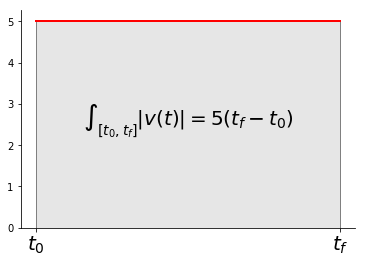

In [3]:
t_0 = 0
t_f = 10 # integral limits
t = np.linspace(t_0, t_f)

fig, ax = plt.subplots()
ax.plot(t, np.abs(v(t,t_f)), 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
it = np.linspace(t_0, t_f)
iv = np.abs(v(it,t_f))
verts = [(t_0, 0), *zip(it, iv), (t_f, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (t_0 + t_f), 2.5, r"$\int_{[t_0,t_f]} \vert v(t)\vert=5(t_f-t_0)$",
        horizontalalignment='center', fontsize=20)



ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((t_0, t_f))
ax.set_xticklabels(('$t_0$', '$t_f$'), fontsize=20);

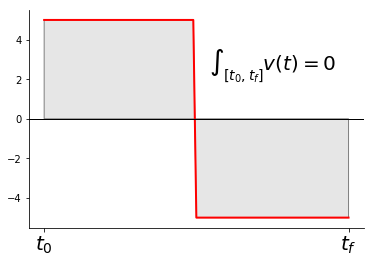

In [4]:
t_0 = 0
t_f = 10 # integral limits
t = np.linspace(t_0, t_f, 101)

fig, ax = plt.subplots()
ax.plot(t, v(t,t_f), 'r', linewidth=2)

# Make the shaded region
it = np.linspace(t_0, t_f, 101)
iv = v(it,t_f)
verts = [(t_0, 0), *zip(it, iv), (t_f, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.75 * (t_0 + t_f), 2.5, r"$\int_{[t_0,t_f]} v(t)=0$",
        horizontalalignment='center', fontsize=20)

ax.axhline(0, linewidth=1, c='k') #plot $v=0$ line to more clearly demonstrate the positive/negative parts

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((t_0, t_f))
ax.set_xticklabels(('$t_0$', '$t_f$'), fontsize=20);

## What do we see?

It appears that these integrals are just given by numbers associated with the *areas* of the shaded rectangles. 

In particular, $\int_{[t_0,t_f]} |v(t)|$ is exactly the area of the single shaded rectangle.

On the other hand, $\int_{[t_0,t_f]} v(t)$ is given by the area of the rectangle above the $t$-axis *minus* the area of the rectangle below the $t$-axis. They appear to *cancel* each other out. In fact, if we think of areas as being *signed* so that any area above a horizontal axis is positive and any area below the horizontal axis is negative, then we see that $\int_{[t_0,t_f]} v(t)$ is actually the sum of the *signed* areas. 

This actually leads us to a useful conceptualization of integrals in terms of "sizes" of positive and negative regions of a function over a set. 

Below, we visualize what the sign of an integral is for a function in terms of what dominates: the positive or negative areas.

In [5]:
from scipy.integrate import quad

In [6]:
def plot_integral(f, x_min, x_max, a, b):
    x = np.linspace(x_min, x_max, 101)
    y = f(x)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(x, y, 'r', linewidth=2)

    plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis
    
    # Make the shaded region
    ix = np.linspace(a, b, 101)
    iy = f(ix)
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

    int_ab = quad(f, a, b)[0]
    
    ax.set_title(r"$\int_a^b f(x)\mathrm{d}x \approx $ %3.2f" %int_ab, fontsize=20)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')

    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))

In [7]:
%reset -f out

interact(plot_integral, 
         f = widgets.fixed(lambda x: (x + 1) * (x - 5) * np.sin(3*x)),
         x_min = widgets.fixed(-1),
         x_max = widgets.fixed(5),
         a = widgets.FloatSlider(value=2, min=-1, max=5, step=0.1),
         b = widgets.FloatSlider(value=4, min=-1, max=5, step=0.1));

Flushing output cache (0 entries)


interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-1.0), FloatSlider(value=4.0, descr…

### These are just 1-dimensional examples

Above, we have just looked at functions with univariate inputs. We see that the integral is related to the *signed* area between the curve defined by the function and the axis defined by the input.

This can be conceptually extended to functions with multivariate inputs. Suppose $f(x)$ is a real-valued function, but $x=(x_1,x_2)$ is a point in $\mathbb{R}^2$. Then, for a set $A\subset\mathbb{R}^2$, the integral $\int_A f(x)$ is related to the *signed volume* between the *surface* given by the graph of $f(x)$ over $A$ and the horizontal *plane* defined by the 2-dimensional input.

Generalizing the concept of area/volume is necessary to describe integrals in geometric terms when the inputs are three-dimensional or higher. 

We can pretty much stick with 1-dimensional examples to explore the typical numerical algorithms used to estimate integrals although some of the strengths and weaknesses of these algorithms are not apparent until we get to higher dimensions. Keep that in mind.

## Part (ii) Numerical integration algorithms

There are lots of algorithms to perform numerical integration, e.g., see https://en.wikipedia.org/wiki/Numerical_integration

While we are going to explore how to implement some of these algorithms as in-class exercises, our learning objectives go beyond simple correct implementation. We will also consider what it means to do the following:

- *compare* different algorithms developed for solving the same generic problem;

- use this comparison to *choose* the "right" algorithm for solving a *specific* problem;

- develop a module that encodes various algorithms and a *wrapper* function that automatically chooses which algorithm to apply based on the inputs.

Some of this is done in-class while other parts are left for homework.

## Geometric methods (Approx. time: 45 minutes)
---

Many of the deterministic approaches to estimating integrals are based on partitioning $A$ (i.e., cutting up the set $A$ into a non-overlapping collection of subsets although we allow for shared boundaries between the subsets) such that the signed "areas" (or "volume" or generalizations of volume) between the graph of $f(x)$ and these subsets drawn on the horizontal axis (or plane or hyperplane) defined by the inputs are well-approximated by a simple geometric object for which we know the area (or volume or generalization of volume).

The simplest such methods for 1-D problems involve the use of rectangles. Moreover, when $A$ is simply an interval, we typically choose the partition of $A$ to be equally sized sub-intervals and approximate the signed area of $f(x)$ over each subinterval using a rectangle that is as wide as the sub-interval with height given by the evaluation of $f(x)$ at some point in the sub-interval. Then, adding up all the signed areas of rectangles gives an approximation to the integral. This is visualized below where we provide some options about where we can evaluate the function $f(x)$. 

In [8]:
def plot_rectangle_rules(f, x_min, x_max, a, b, N_rect, rule='left'):
    x = np.linspace(x_min, x_max, 101)
    y = f(x)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(x, y, 'r', linewidth=2)

    plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis
    
    # Make the rectangles and approximate integral
    ix = np.linspace(a, b, N_rect+1)
    Delta_x = ix[1]-ix[0]
    
    if rule == 'left':
        iy = f(ix[0:-1])
    elif rule == 'right':
        iy = f(ix[1:])
    else:
        iy = f(ix[0:-1]+0.5*Delta_x)
    
    rects = []
    for i in range(N_rect):
        rects.append(Rectangle((ix[i],0), Delta_x, iy[i]))
        
    # Create patch collection with specified colour/alpha
    pc = PatchCollection(rects, facecolor='0.9', alpha=0.5,
                         edgecolor='0.5')
    ax.add_collection(pc)
    
    int_approx = np.sum(iy)*Delta_x           
    
    int_ab = quad(f, a, b)[0]
    
    ax.set_title(r"$\int_a^b f(x)\mathrm{d}x = %3.2f \approx $ Sum of Rect. Areas = %3.2f" 
                 %(int_ab, int_approx), fontsize=20)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')

    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))

In [9]:
%reset -f out

interact(plot_rectangle_rules, 
         f = widgets.fixed(lambda x: (x + 1) * (x - 5) * np.sin(3*x)),
         x_min = widgets.fixed(-1),
         x_max = widgets.fixed(5),
         a = widgets.FloatSlider(value=2, min=-1, max=5, step=0.1),
         b = widgets.FloatSlider(value=4, min=-1, max=5, step=0.1),
         N_rect = widgets.IntSlider(value=3, min=1, max=10),
         rule=['left', 'right', 'middle']);

Flushing output cache (0 entries)


interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-1.0), FloatSlider(value=4.0, descr…

## Activity

Create a function that computes the left-, right-, and midpoint-rules over a list/array of number of rectangles and compute/plot the errors as a function of number of rectangles on a log-log plot. Do this for a number of lambda functions.

## [Monte Carlo (MC) Integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration) (Approx. time: 1 hour and 30 minutes)
---


The basic idea is to estimate $\int_A f(x)$ using the *average* of a random sample of $f(x)$ values. 

The question is this: how do we generate a random sample of $f(x)$ values to do this?

Well, we generate a random sample of $x$ values in the set $A$, and then evaluate the function $f$ at these random inputs. Then, we simply compute the sample average of $A$. 

Are there any sticky points to this?

Well, a few simple examples will illustrate just about all you possibly need to know.

Suppose $f(x)=5$ on $[0,1]$. From our previous example involving velocity and conceptualizing the integral of a real-valued function with a univariate input as the signed area between the curve and horizontal axis, we know that $\int_{[0,1]} 5 = 5(1-0)=5$. So, this is what our MC estimate should be approximating.

In fact, for any random sample of $x$-values between $[0,1]$, we will *always* get that the corresponding function values are *all* 5 because $f(x)$ is a constant 5 on this interval. So, what would the sample average be of these randomly sampled function values? Well, 5 of course! Whoa! The MC estimate is *exact* in this case. Great!

What if $f(x)=5$ on $[0,2]$? So, all we have done is change the set from $[0,1]$ to $[0,2]$. We know the exact answer should now be $\int_{[0,2]} 5 = 5(2-0)=10$. However, by the same reasoning, any random sample of $f(x)$ values will produce a sample average of $5$ not $10$. 

What if $f(x)=5$ on $[0,0.5]$? Again, the exact answer is $\int_{[0,0.5]} 5 = 5(0.5-2)=2.5$, yet any sample average of $f(x)$ values will produce $5$ not $2.5$. 

So, what is going on? Well, we need to *weight* the sample average by the *size* of the set $A$. 

In summary, if $\{x_i\}_{i=1}^N \subset A$ is a *uniform* random sample from the set $A$, and we let $\mu(A)$ denote the *measure* (i.e., size) of $A$, then an MC estimate of the integral is given by
$$
    \int_A f(x) \approx \mu(A)\frac{1}{N}\sum_{i=1}^N f(x_i).
$$

Let's play with this below and discuss what we are seeing.

In [ ]:
def plot_MC_1D(f, a, b, x_min, x_max, N_MC):
    x = np.linspace(x_min, x_max, 101)
    y = f(x)
    
    x_random = np.random.uniform(low=a, high=b, size=int(N_MC))
    mu_A = b-a #mu_A=measure (size) of A
    
    fig, ax = plt.subplots()
    ax.plot(x, y, 'r', linewidth=2)

    plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis
    
    # Make the shaded region
    ix = np.linspace(a, b, 101)
    iy = f(ix)
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

    avg_func = np.mean(f(x_random))
    MC_est = mu_A * avg_func
    
    # Make a rectangle corresponding to the MC_est
    verts = [(a, 0), (a, avg_func), (b, avg_func) , (b, 0)]
    rect = Polygon(verts, facecolor='b', alpha=0.25, edgecolor='0.5')
    ax.add_patch(rect)
    
    ax.set_title(r"$\int_a^b f(x)\mathrm{d}x \approx \frac{b-a}{N}\sum_{i=1}^N f(x_i)$ %3.2f" %MC_est, fontsize=20)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')

    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))
  

In [ ]:
%reset -f out

# Using an interact_manual widget so that we can re-run easily to observe
# the variations in the MC estimates due to random sampling.

interact_manual(plot_MC_1D, 
         f = widgets.fixed(lambda x: (x + 1) * (x - 5) * np.sin(3*x)),
         x_min = widgets.fixed(-1),
         x_max = widgets.fixed(5),
         a = widgets.FloatSlider(value=1, min=-1, max=5, step=0.1),
         b = widgets.FloatSlider(value=2.5, min=-1, max=5, step=0.1),
         N_MC = widgets.IntSlider(value=1E2, min=10, max=1E4, step=10))

## Activity

***To-Do:*** Something with a function computing 1-D MC estimates over intervals and repeating the computation to compute statistics of errors that are plotted. 

## What if the set $A$ is complicated?

The typical built-in random number generators available in `numpy.random` or `scipy.stats` are great for generating random numbers/vectors in *nice* geometric sets like intervals in 1-D, rectangles in 2-D, rectangular boxes in 3-D, and generalizations of rectangular boxes in higher-dimensions. 

But, what if $A$ is not an interval or box-shaped? What if we can only describe $A$ in terms of relationships to other points or other geometric shapes? 

Well, we can do something referred to as accept-reject (sometimes just called rejection) sampling. 

Basically, we create a "dart board" out of a simple object (like a box) that *contains* the set $A$. The set $A$ is the "target" of the dart board. We generate random numbers/vectors in the simple object (i.e., we "throw darts at the board") and *check* if these are in $A$ (i.e., we check if a "dart hits the target"). 

Let's illustrate when $A$ is a unit disk in $\mathbb{R}^2$ that we fit into the dart board defined by the square $[-1,1]\times[-1,1]$.

In [ ]:
def plot_MC_disk_dart(N_MC):

    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_aspect(1)
    
    A = plt.Circle((0, 0), 1, color='r', alpha=0.1)
    ax.add_artist(A)
    
    #throw darts at circumscribing square
    darts = np.random.uniform(low=-1, high=1, size=(int(N_MC),2))
    
    #check which darts hit the target
    idx_in_A = np.where(np.linalg.norm(darts,2,axis=1)<1)[0]
    idx_not_in_A = np.where(np.linalg.norm(darts,2,axis=1)>1)[0]
    
    ax.scatter(darts[idx_in_A,0], darts[idx_in_A,1], s=20, marker='x', c='k')
    
    ax.scatter(darts[idx_not_in_A,0], darts[idx_not_in_A,1], s=20, marker='o', c='b')
    
    mu_A_est = len(idx_in_A)/N_MC * 4

    ax.set_title(r"$\mu(A)\approx \mu$(dart board)$\times$(percent of darts in $A$) $\approx$ %3.2f" 
                 %mu_A_est, fontsize=20)

In [ ]:
%reset -f out

# Using an interact_manual widget so that we can re-run easily to observe
# the variations in the MC estimates due to random sampling.

interact_manual(plot_MC_disk_dart, 
                N_MC = widgets.IntSlider(value=1E2, min=10, max=1E4, step=10))

## Activity

1. Based on the code above, create a new function in the code cell below that estimates and visualizes the values of integrals of some functions $f$ over the unit circle.

2. Run some tests for different `lambda` functions. 

3. Repeat this for different types of sets $A$ such as ellipses.

## Activity

1. Write a function to perform MC integration to estimate the "amount of yellow" in pacman (shown below) for different values of `mouth_angle`. Test this function.

2. Write a modified function to perform MC integration of a function defined on the yellow parts of pacman for different values of `mouth_angle`. Test this function.

In [ ]:
def plot_pacman(mouth_angle = np.pi/4):
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_aspect(1)
    
    resolution = 200
    pacman_x = np.zeros(resolution)
    pacman_y = np.zeros(resolution)
    
    theta = np.linspace(mouth_angle, 2*np.pi-mouth_angle, 199)
    pacman_x[1:] = np.cos(theta)
    pacman_y[1:] = np.sin(theta)
           
    verts = [*zip(pacman_x, pacman_y)]
    
    head = Polygon(verts, facecolor='y', edgecolor='0.5', alpha=0.75)
    ax.add_patch(head)
    
    #Let's add an eye :-)
    eye = plt.Circle((-0.25, 0.5), 0.1, color='w')# edgecolor='k')
    ax.add_artist(eye)

In [ ]:
%reset -f out

interact(plot_pacman,
         mouth_angle = widgets.FloatSlider(value=np.pi/6,min=0,max=np.pi/3,step=np.pi/100));